Importar liberias.

In [1]:
import matplotlib.image as mpimg # lectura de imagenes
import matplotlib.pyplot as plt  # mostrar imagenes
import base64  # convertir a formato baase64
from oscar_python.client import Client # api de python para OSCAR

Direccion de imagen a procesar.

In [2]:
dir_img="img/image-orig_1.jpg"

Lectura de imagen y visualización de imagen cargada

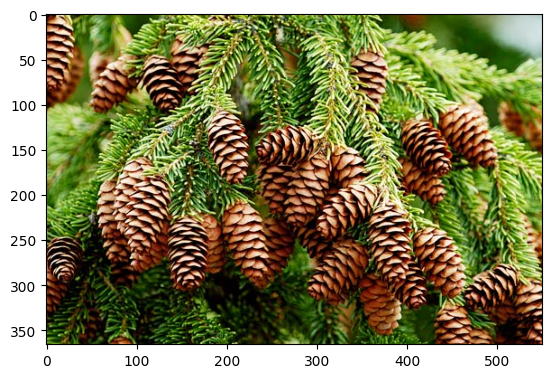

In [3]:
img = mpimg.imread(dir_img)   # Read Images
plt.imshow(img)  # Output Images

Codificar imagen en base64

In [4]:
with open("img/image-orig_1.jpg", 'rb') as binary_file:
    binary_file_data = binary_file.read()
    base64_encoded_data = base64.b64encode(binary_file_data)
    base64_message = base64_encoded_data.decode('utf-8')
    my_string = base64_message

Declarar el objeto de conexion con OSCAR

In [5]:
client = Client("oscar","http://localhost", "oscar", "NDA3OWFk", True)

Obtener información del servicio Grayify

In [6]:
service = client.get_service("grayify")

print(service.text)

{"name":"grayify","cluster_id":"oscar-cluster","memory":"1Gi","cpu":"1.0","total_memory":"","total_cpu":"","enable_gpu":false,"synchronous":{"min_scale":0,"max_scale":0},"rescheduler_threshold":0,"log_level":"INFO","image":"ghcr.io/grycap/imagemagick","alpine":false,"token":"c22940ef664fc70a216f41270be665aaf4e17c0d4751d990100bd3a581f18cf2","input":[{"storage_provider":"minio","path":"grayify/in"}],"output":[{"storage_provider":"minio","path":"grayify/out"}],"script":"#!/bin/bash\n\necho \"SCRIPT: Invoked Image Grayifier. File available in $INPUT_FILE_PATH\"\nFILE_NAME=`basename \"$INPUT_FILE_PATH\"`\nOUTPUT_FILE=\"$TMP_OUTPUT_DIR/$FILE_NAME\"\necho \"SCRIPT: Converting input image file $INPUT_FILE_PATH to grayscale to output file $OUTPUT_FILE\"\nconvert \"$INPUT_FILE_PATH\" -type Grayscale \"$OUTPUT_FILE\"\n","environment":{"Variables":{}},"annotations":{},"labels":{"applicationId":"grayify","oscar_service":"grayify","queue":"root.oscar-queue.grayify"},"storage_providers":{"minio":{"de

Invocar al servicio Grayify

In [7]:
try:
    res = client.run_service("grayify", input = my_string)
    if res.status_code == 200:
       print("Services OK")
except Exception as ex:
    print("Error running service: ", ex)



Services OK


Visualizar imagen procesada

base64_img=res.text
base64_img_bytes = base64_img.encode('utf-8')
with open('decoded_image.jpg', 'wb') as file_to_save:
    decoded_image_data = base64.b64decode(base64_img_bytes)
    file_to_save.write(decoded_image_data)
    
img2 = mpimg.imread('decoded_image.jpg')   # Read Images
plt.imshow(img2)  # Output Images